<a href="https://colab.research.google.com/github/buzaev-fedor/project-from-ml-course/blob/master/HW_%E2%84%966.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №6

В этом домашнем задании нам нужно закрепить основы теорвера и статистики.

# Задача №1 (2б)

(2 балла) Предположим Вы покупаете новый телефон, 80% покупателей удовлетворены покупкой. На каждой странице по 20 отзывов. Вы наугад выбираете одну из страниц отзывов, найдите вероятности обнаружить 12, 16 и 19 положительных отзывов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import pandas as pd
from scipy import stats

In [ ]:
def positiv_answer(k, n, p):
    loc = 0
    answ = binom.pmf(k, n, p, loc)
    return (f"Вероятность найти {k} положительных = {answ}")

In [ ]:
print(positiv_answer(12, 20, 0.8))
print(positiv_answer(16, 20, 0.8))
print(positiv_answer(19, 20, 0.8))

Вероятность найти 12 положительных = 0.022160876760150803
Вероятность найти 16 положительных = 0.21819940194610007
Вероятность найти 19 положительных = 0.05764607523034236


# Задача №2 (2б)

(1 балл) Опираясь на задачу 1 найти вероятность того, что 2/5 всех отзывов на случайно выбранной странице будут негативными.

In [ ]:
def answer(k, n, p):
    loc = 0
    answ = binom.pmf(k, n, p, loc)
    return answ

In [ ]:
anst = 0
for i in range(0, 13):
    b = answer(i, 20, 0.8)
    anst += b
anst

0.03214266308087508

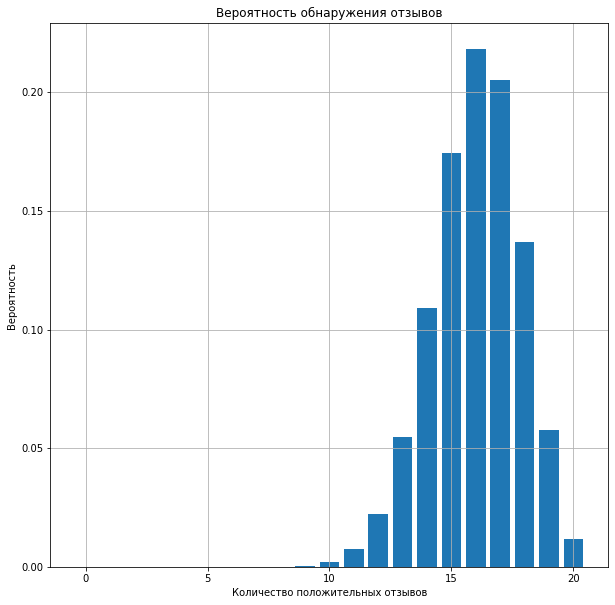

In [ ]:
n = 20
p = 0.8

def binomial(n, k):
    comb =1
    for i in range(min(k, n-k)):
        comb = comb*(n-i) // (i+1)
    return comb

pmf = np.array([p**i * (1-p)**(n-i) * binomial(n, i) for i in range(n + 1)])

fig = plt.figure(figsize = (10, 10))
plt.bar([i for i in range(n + 1)], pmf)
plt.grid()
plt.title('Вероятность обнаружения отзывов')
plt.xlabel('Количество положительных отзывов')
plt.ylabel('Вероятность')
plt.show()

(1 балл) Построить гистограмму вероятностей обнаружения положительных отзывов на странице.

# Задача №3 (4б)

Предположим у вас имеется датасет с описанием людей и меткой ' <=50K', которая показывает, получает ли человек (в США) более или менее 50к$ в год. Используя теорему Байеса покажите, что с ростом образования вероятность получать >50k в год растет.

Код загрузки данных и результирующая таблица предоставлены.

[Подсказка, теорема Байеса говорит нам, что

$$P( > или < 50k|класс-образования) = \frac{P(класс-образования | > или < 50k) * P(> или < 50k)}{P(наблюдать-этот-класс-образования)}$$


Для лаконичной агрегации данных в pandas встроена функция [group by](https://realpython.com/pandas-groupby/)
]

In [ ]:
df_temp = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [ ]:
df_temp.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df = df_temp[[' Bachelors', ' <=50K']]
# работаем конкретно с этой таблицей
df.head()

,Bachelors,<=50K
0,Bachelors,<=50K
1,HS-grad,<=50K
2,11th,<=50K
3,Bachelors,<=50K
4,Masters,<=50K


In [ ]:
countEdu = df.groupby([' Bachelors'])[' Bachelors'].count()
countEdu

 Bachelors
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5354
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name:  Bachelors, dtype: int64

In [ ]:
countSalary = df.groupby([' <=50K'])[' <=50K'].count()
countSalary

 <=50K
 <=50K    24719
 >50K      7841
Name:  <=50K, dtype: int64

In [ ]:
totalSalary = countSalary.sum()

In [ ]:
a = countSalary[0]/totalSalary
b = countSalary[1]/totalSalary
print(a)
print(b)

0.7591830466830467
0.24081695331695332


In [ ]:
test_df = pd.DataFrame(df.groupby([' Bachelors', ' <=50K'])[' Bachelors'].count())
test_df['Всего людей по классу образования'] = 0
test_df['P(наблюдать этот класс образования)'] = np.dtype(float)
test_df['P(> или < 50k)'] = np.dtype(float)
test_df['P(класс образования | > или < 50k)'] = np.dtype(float)
test_df['P( > или < 50k | класс образования)'] = np.dtype(float)
for i in range(test_df.index.size):
    test_df['Всего людей по классу образования'][i] = (sum(test_df.loc[test_df.index[i][0]].values[:2,0]))
    test_df['P(наблюдать этот класс образования)'][i] = ((test_df.values[i][1])  / totalSalary).round(6)
    if test_df.index[i][1] == test_df.index[0][1]:
        test_df['P(> или < 50k)'][i] = a
        test_df['P(класс образования | > или < 50k)'][i] = (test_df.values[i,0]/countSalary[0]).round(6)
        test_df['P( > или < 50k | класс образования)'][i] = ((test_df['P(> или < 50k)'][i] * test_df['P(класс образования | > или < 50k)'][i]) / test_df['P(наблюдать этот класс образования)'][i]).round(6)
    else:
        test_df['P(> или < 50k)'][i] = b
        test_df['P(класс образования | > или < 50k)'][i] = (test_df.values[i,0]/countSalary[1]).round(6)
        test_df['P( > или < 50k | класс образования)'][i] = ((test_df['P(> или < 50k)'][i] * test_df['P(класс образования | > или < 50k)'][i]) / test_df['P(наблюдать этот класс образования)'][i]).round(6)
test_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6

Bachelors  ...  P( > или < 50k | класс образования)
 Bachelors     <=50K              ...                                     
 10th          <=50K         871  ...                             0.933539
               >50K           62  ...                             0.066451
 11th          <=50K        1115  ...                             0.948942
               >50K           60  ...                             0.051064
 12th          <=50K         400  ...                             0.923761
               >50K           33  ...                             0.076216
 1st-4th       <=50K         162  ...                              0.96428
               >50K            6  ...                             0.035703
 5th-6th       <=50K         317  ...                             0.951967
               >50K           16  ...                              0.04806
 7th-8th       <=50K         606  ...                             0.938111
               >50K           40  ...                             0.061916
 9th           <=50K         487  ...                             0.947464
               >50K           27  ...                             0.052523
 Assoc-acdm    <=50K         802  ...                             0.751654
               >50K          265  ...                             0.248364
 Assoc-voc     <=50K        1021  ...                             0.738775
               >50K          361  ...                             0.261214
 Bachelors     <=50K        3133  ...                             0.585171
               >50K         2221  ...                              0.41483
 Doctorate     <=50K         107  ...                             0.259106
               >50K          306  ...                             0.740943
 HS-grad       <=50K        8826  ...                             0.840491
               >50K         1675  ...                             0.159509
 Masters       <=50K         764  ...                             0.443404
               >50K          959  ...                             0.556585
 Preschool     <=50K          51  ...                              1.00012
 Prof-school   <=50K         153  ...                              0.26565
               >50K          423  ...                              0.73439
 Some-college  <=50K        5904  ...                             0.809767
               >50K         1387  ...                             0.190235

[31 rows x 6 columns]

Из таблицы видно, что вероятность получать более 50 тыс $ в год растет с образованием. См. вероятности >50K у бакалавров, мастеров и докторов (0.414830, 0.556587, 0.740920 соответсвенно)

# Задача №4 (2б)

Пускай мы имеем 2 выборки нормально распределенных наблюдений. Проверить, различаются ли выборки между собой. (Полагаем уровень значимости p = 0,01)

In [ ]:
np.random.seed(1346)
first = stats.norm.rvs(loc=5,scale=10,size=1000)
second = stats.norm.rvs(loc=5,scale=10,size=1000)

(array([ 11.,  33., 115., 183., 222., 206., 144.,  58.,  24.,   4.]),
 array([-23.37219053, -17.32136268, -11.27053482,  -5.21970697,
          0.83112088,   6.88194873,  12.93277658,  18.98360443,
         25.03443228,  31.08526013,  37.13608798]),
 <a list of 10 Patch objects>)

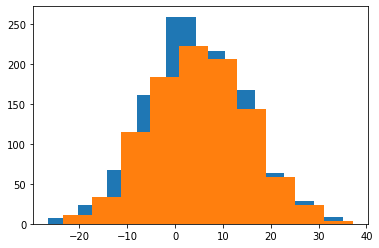

In [ ]:
plt.hist(first)
plt.hist(second)

In [ ]:
scipy.stats.ttest_rel(second, first)

Ttest_relResult(statistic=2.0068498129259122, pvalue=0.045034711924137716)